# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [4]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
#from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, make_scorer
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [5]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [6]:
# word net installation:

# unmark if you want to use and need to install
#!pip install wn
#!python -m wn download omw-he:1.4

In [7]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [8]:
#!pip install hebrew_tokenizer

In [9]:
##import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [10]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [11]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [12]:
df_train['story'].iloc[2]

'מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנגויה, מחפשים חברים וקובעים קבוצות. לא היה קל להכיר אנשים חדשים במכללה במיוחד שלא מכירים אף אחד מראש אבל אחרי מאמצים הצלחתי למצוא לעצמי חברות אנשים נחמדים להיות איתם. וכבר בחודש הראשון של התואר ידעתי עם מי אני נוסעת 5 חברות חדשות שפגשתי בכיתה שלי ורצינו ללכת ביחד כולנו באותו ראש עובדות חלק רווקות וחלק בזוגיות אבל מה שהכי רצינו לעשות זה ללכת לחגוג אז ישר קבענו ביחד. אפילו את החדרים שלנו סגרנו כשהייתי בחול אצל לקוח של החברה שלי ככה שלא היה אכפת לי לפנות לזה זמן כדי שנוכל ללכת ולהנות שם. ואז התחילה הקורונה ושיהשה את כל התוכניות. יצא שבמשך תקופה מאוד ארוכה דחו את הקורונה בלי הפסקה מספר פעמים, כך שבמקום מאי של אותה שנה הפנגויה היתה בספטמבר שנתיים אחרי. וגם היה שינויים במסיבות ובתוכניה של הפנגויה , כלומר לא פנגויה רגילה אבל אחרי שנתיים לאף אחד לא אכפת. וכל אחת מהבנות גם היתה בסטטוס אחר , וכך יצא שבמקום 5 בנות נשארנו רק 3 (אבל לפחות החברות הכי טובות) במשך תקופה מאוד ארוכה תיכננו מה נקנה ומה נלבש ולאן נצא, אפילו קבענו מקום למסעדה שנקראת " "המחבוא ש

In [13]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

### Step 1: Prepare The Data To Tokenizing
Data preparation for tokenization is essential to transform raw text into a format suitable for natural language processing tasks. By breaking the text into smaller units or tokens, it enables the extraction of meaningful features and patterns. Tokenization facilitates tasks such as sentiment analysis, topic modeling, and text classification. It plays a crucial role in understanding and analyzing textual data accurately and efficiently.

### Step 1.1: Cleaning The Data
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To fix the data and remove all the unnecessary syntax(punctuation, numbers etc.)
    
<u><b>Explanation of the step:</b></u>
    
The function takes a piece of text as input.
    
It applies a regular expression pattern to remove any characters that are not Hebrew letters or whitespace from the text, resulting in **cleaned_text**.
    
The function then returns the **cleaned_text**, which represents the original text with non-Hebrew characters removed.

In [14]:
def clean_text(text):
    cleaned_text = re.sub(r'[^\u0590-\u05FF\s]', '', text)
    return cleaned_text

### Step 1.2: Apply The Fixed Data 
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To prepare the gender labels in a numeric format suitable for training machine learning models.
 
<u><b>Explanation of the step:</b></u>
    
The code creates a copy of the original training dataframe, assigning it to the variable **df_train_tokenized**.
    
Then, it applies the function **clean_text** to the ***'story'*** column of the **df_train_tokenized** dataframe, performing text cleaning operations.
    
Afterward, a **LabelEncoder** object, **le**, is initialized and used to transform the ***'gender'*** column of the **df_train_tokenized** dataframe into numeric labels, which are stored in the **y_train** variable

In [15]:
df_train_tokenized = df_train.copy()
df_train_tokenized['story'] = df_train_tokenized['story'].apply(clean_text)
le = LabelEncoder()
y_train = le.fit_transform(df_train_tokenized['gender'])
for i, class_ in enumerate(le.classes_):
    print(f"The class {class_} in y_train has switched to {i}")
df_train_tokenized

The class f in y_train has switched to 0
The class m in y_train has switched to 1


,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,m
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,f
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m
751,החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...,f


### Step 2: Prepare For Evaluation
Preparing for evaluation with the provided functions allows for exploring different models and their hyperparameter configurations, facilitating the identification of optimal settings for improved performance and accuracy assessment.

### Step 2.1: Define The Dictionaries That We Used

<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
 To define and configure different classifiers, vectorizers, and their corresponding parameters for training and evaluating machine learning models in a text classification task.
 
<u><b>Explanation of the step:</b></u>
    
- The **classifiers** dictionary contains various classifier models with their respective names as keys.
    
- The **vectorizers** dictionary holds different vectorizer models along with their names as keys.
    
- The **vectorizer_params** dictionary specifies the parameter grids for each vectorizer, determining the different combinations of hyperparameters to be explored during the model evaluation process.
    
- The **param_grids** dictionary defines the parameter grids for each classifier, specifying the hyperparameters to be tuned for each classifier model.

In [16]:
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
vectorizers = {
    'TF-IDF': TfidfVectorizer(),
    'CountVectorizer': CountVectorizer()
}
vectorizer_params = {
    'TF-IDF': {
        'vectorizer__max_features': [10000, 20000, 30000],
        'vectorizer__min_df': [1, 3],
        'vectorizer__ngram_range': [(1, 1), (1, 2)]
    },
    'CountVectorizer': {
        'vectorizer__max_features': [10000, 20000, 30000],
        'vectorizer__min_df': [1, 3],
        'vectorizer__ngram_range': [(1, 1), (1, 2)]
    }
}
param_grids = {
    'MultinomialNB': {'classifier__alpha': [0.1, 0.5, 1, 10]},
    'LinearSVC': {'classifier__C': [0.1, 0.5, 1], 'classifier__penalty': ['l2'], 'classifier__loss': ['squared_hinge'], 'classifier__max_iter': [1000]},
    'SGDClassifier': {'classifier__alpha': [0.0001, 0.001, 0.01], 'classifier__loss': ['hinge', 'log', 'modified_huber'], 'classifier__penalty': ['l2', 'l1', 'elasticnet'], 'classifier__max_iter': [1000]},
    'Perceptron': {'classifier__alpha': [0.001, 0.05, 0.1], 'classifier__penalty': [None, 'l2', 'l1', 'elasticnet'], 'classifier__max_iter': [1000]},
    'LogisticRegression': {'classifier__C': [0.01, 0.1, 1.0, 10.0], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear', 'saga'], 'classifier__max_iter': [1000]},
    'DecisionTree': {'classifier__max_depth': [3, 5, 7, 10], 'classifier__criterion': ['gini', 'entropy']},
    'KNN': {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['cosine', 'euclidean']}
}

### Step 2.2: Define The Function To Create Pipline
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
 The creation of pipeline is to streamline and automate the process of constructing a sequence of data transformation and model training steps for machine learning.
 
<u><b>Explanation of the step:</b></u>
    
 The function has generates a **list** of pipelines.
    
Each pipeline is a sequence of data processing components, including a vectorizer, scaler, and classifier.
    
Then, the function iterates over the available vectorizers and classifiers, creates a pipeline by combining them with a **MaxAbsScaler()** for data normalization, and adds the pipeline to the list of pipelines.
    
Finally, the function returns the **list** of pipelines for further use in the project.

In [17]:
def create_pipelines():
    pipelines = []
    
    for vectorizer_name, vectorizer in vectorizers.items():
        for classifier_name, classifier in classifiers.items():
            pipeline = Pipeline([
                ('vectorizer', vectorizer),
                ('scaler', MaxAbsScaler()),
                ('classifier', classifier)])
            
            pipelines.append((f'{classifier_name} with {vectorizer_name}', pipeline))
    
    return pipelines

### Step 2.3: Define The Function To Split The DataFrame
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
 To split the dataset into training and testing sets, separating the input features ***'story'*** into **X_train** and **X_test**, and the target variable ***'gender'*** into **y_train** and **y_test**.
    
<u><b>Explanation of the step:</b></u>
    
 The function takes a DataFrame df as input and performs a **train-test()** split on the data. 
    
It splits the ***'story'*** column as the input features into **X_train** and **X_test**, and the ***'gender'*** column as the target variable into **y_train** and **y_test**.
    
The split is done with a test size of 20% and a random state of 42, ensuring consistent results for reproducibility.
    
The function then returns the four resulting arrays: **X_train**, **X_test**, **y_train**, and **y_test**.

In [18]:
def train_test_split_func(df):
    X_train, X_test, y_train, y_test = train_test_split(df["story"], df["gender"], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

### Step 2.4: Define The Function To Find The Best Params
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
 To perform a grid search with cross-validation on a given pipeline and parameter grid to identify the best combination of 
hyperparameters that maximizes the model's performance on the training data. It returns the best parameters found during the grid search.
    
<u><b>Explanation of the step:</b></u>
 The function performs a grid search with cross-validation to find the best combination of hyperparameters for a given pipeline using the provided parameter grid. 
    
It fits the pipeline on the training data and evaluates the performance using cross-validation. 
    
The function then retrieves and returns the best parameters that yielded the highest performance during the grid search.

In [19]:
def find_best_parameters(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

### Step 2.5:  Define The Function To  Evaluate The Model
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
 To train the given model on the training data, evaluates its performance using cross-validation, and calculates the average F1 score.
It also returns the trained model and the average F1 score as the evaluation result.
    
<u><b>Explanation of the step:</b></u>
    
 The function takes a model, training data, and test data as inputs. It fits the model to the training data, performs cross-validation to evaluate the model's performance using F1 score, and calculates the average F1 score.
    
It then predicts the labels for the test data, evaluates the model's F1 score separately for each gender, and computes the average F1 score as the overall evaluation metric.
    
The function returns the trained model and the average F1 score.

In [20]:
def fit_predict_evaluate(model_name, X_train, X_test, y_train, y_test):
    model_trained = model_name.fit(X_train, y_train)  #Fitting our model with the train values
    cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=42)  #Using different amount of folds for cross_val_score function
    f1_scorer = make_scorer(f1_score)
    scores = cross_val_score(model_trained, X_test, y_test, scoring=f1_scorer, cv=cv, n_jobs=-1)
    scores
    
    y_pred = model_trained.predict(X_test)
    f1_male = f1_score(y_test, y_pred, pos_label='f') #Evaluate the performance for male
    f1_female = f1_score(y_test, y_pred, pos_label='m') #Evaluate the performance for female

    f1_average = (f1_male + f1_female) / 2
    return model_trained, f1_average

### Step 3: Evaluation
The evaluation step assesses the model's performance in classifying the gender of stories.

It provides insights into the model's accuracy and effectiveness, guiding decisions on its deployment and potential improvements.

### Step 3.1: Data Split And Pipeline Creation

In [21]:
X_train, X_test, y_train, y_test = train_test_split_func(df_train_tokenized)
X_df_test = df_test['story']
df_predicted = []
pipelines = create_pipelines()

<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To split the dataset into training and testing sets, while the **create_pipelines()** function aims to generate a collection of pipelines with different combinations of vectorizers and classifiers for model training and evaluation.
    
<u><b>Explanation of the step:</b></u>
    
 The code **X_train, X_test, y_train, y_test = train_test_split_func(df_train_tokenized)** splits the **df_train_tokenized** dataset into training and testing sets, assigning the respective features and labels to **X_train**, **X_test**, **y_train**, and **y_test** variables.

The code **pipelines = create_pipelines()** generates a collection of pipelines using different combinations of vectorizers and classifiers, providing a variety of models for training and evaluation.

Together, these two lines of code prepare the data for model development and evaluation by creating the necessary training and testing sets and generating multiple pipelines to explore different model configurations.

### Step 3.2: Starting Evaluating
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To iterate over each pipeline, find the best parameters for each pipeline using **GridSearchCV()**, update the pipeline with the best parameters, fit the pipeline on the training data, evaluate its performance, and print the F1-score for each pipeline.

<u><b>Explanation of the step:</b></u>
    
 In this code, for each pipeline in the **list** of **pipelines**, the code prints the pipeline name and starts the process.
    
It then defines the parameter grid specific to the current **pipeline** and finds the best parameters using **GridSearchCV()**.
    
The **pipeline** is updated with the best parameters, fitted on the training data, and evaluated using the **fit_predict_evaluate()** function.
    
The F1-score is printed, and the process for the current pipeline ends.

In [22]:
f1_scores = []
for pipeline_name, pipeline in pipelines:
    print(f'{pipeline_name} Starting...')
    param_grid = param_grids[pipeline_name.split(' ')[0]] # Define the parameter grid for the current pipeline
    best_params = find_best_parameters(pipeline, param_grid, X_train, y_train) # Find the best parameters using GridSearchCV
    pipeline.set_params(**best_params)# Update the pipeline with the best parameters
    pipeline.fit(X_train, y_train)# Fit the pipeline on training data with the best parameters
    model_trained, f1_average = fit_predict_evaluate(pipeline, X_train, X_test, y_train, y_test)# Use the fit_predict_evaluate function to get predictions and evaluate performance
    f1_scores.append({f'{pipeline_name}': f'{f1_average:.3f}'})
    print(f'F1-score: {f1_average:.3f}')
    print(f'{pipeline_name} Ended')
    print('-----------------------------\n\n')

MultinomialNB with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', MultinomialNB(alpha=1))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', MultinomialNB(alpha=1))])

F1-score: 0.485
MultinomialNB with TF-IDF Ended
-----------------------------


LinearSVC with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', LinearSVC(C=0.5))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', LinearSVC(C=0.5))])

F1-score: 0.558
LinearSVC with TF-IDF Ended
-----------------------------


SGDClassifier with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 SGDClassifier(alpha=0.01, loss='modified_huber',
                               penalty='elasticnet'))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 SGDClassifier(alpha=0.01, loss='modified_huber',
                               penalty='elasticnet'))])

F1-score: 0.658
SGDClassifier with TF-IDF Ended
-----------------------------


Perceptron with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', Perceptron(alpha=0.001))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', Perceptron(alpha=0.001))])

F1-score: 0.651
Perceptron with TF-IDF Ended
-----------------------------


LogisticRegression with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='saga'))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='saga'))])

F1-score: 0.682
LogisticRegression with TF-IDF Ended
-----------------------------


DecisionTree with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

F1-score: 0.584
DecisionTree with TF-IDF Ended
-----------------------------


KNN with TF-IDF Starting...


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', weights='distance'))])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', weights='distance'))])

F1-score: 0.430
KNN with TF-IDF Ended
-----------------------------


MultinomialNB with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', MultinomialNB(alpha=1))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', MultinomialNB(alpha=1))])

F1-score: 0.458
MultinomialNB with CountVectorizer Ended
-----------------------------


LinearSVC with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', LinearSVC(C=0.1))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', LinearSVC(C=0.1))])

F1-score: 0.485
LinearSVC with CountVectorizer Ended
-----------------------------


SGDClassifier with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 SGDClassifier(alpha=0.01, penalty='elasticnet'))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 SGDClassifier(alpha=0.01, penalty='elasticnet'))])

F1-score: 0.622
SGDClassifier with CountVectorizer Ended
-----------------------------


Perceptron with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', Perceptron(alpha=0.001))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', Perceptron(alpha=0.001))])

F1-score: 0.657
Perceptron with CountVectorizer Ended
-----------------------------


LogisticRegression with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='saga'))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='saga'))])

F1-score: 0.622
LogisticRegression with CountVectorizer Ended
-----------------------------


DecisionTree with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=3))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=3))])

F1-score: 0.564
DecisionTree with CountVectorizer Ended
-----------------------------


KNN with CountVectorizer Starting...


Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                      weights='distance'))])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                      weights='distance'))])

F1-score: 0.430
KNN with CountVectorizer Ended
-----------------------------




### Step 4: Results

### Step 4.1: Define The Function To Make List Of Lists
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To convert a list of dictionaries into a list of lists, where each inner list contains the keys or values from each dictionary.

<u><b>Explanation of the step:</b></u>
    
 The code creates an empty **list lst_to_return** to store the final result and a temporary list temp for intermediate calculations.
    
It then iterates over each dictionary in the input, extracts the keys or values using **list(dic.keys())[0]** and **list(dic.values())[0]**, and appends them to temp.
    
Finally, temp is appended to **lst_to_return**, resulting in a list of lists where each inner list contains the keys or values from each dictionary in the input.

In [23]:
def list_of_lists(dictionary): 
    lst_to_reutrn = []
    temp = []
    for dic in dictionary:
        temp.append(list(dic.keys())[0])
    lst_to_reutrn.append(temp)
    temp =[]
    for dic in dictionary:
        temp.append(list(dic.values())[0])
        lst_to_reutrn.append(temp)
    return lst_to_reutrn

### Step 4.2: Make DataFrame Of The Results

In [24]:
data = list_of_lists(f1_scores)
data_dict = {'Pipeline' : data[0],
             'f1_score' : data[1]
            }
results = pd.DataFrame(data_dict)
results

,Pipeline,f1_score
0,MultinomialNB with TF-IDF,0.485
1,LinearSVC with TF-IDF,0.558
2,SGDClassifier with TF-IDF,0.658
3,Perceptron with TF-IDF,0.651
4,LogisticRegression with TF-IDF,0.682
5,DecisionTree with TF-IDF,0.584
6,KNN with TF-IDF,0.430
7,MultinomialNB with CountVectorizer,0.458
8,LinearSVC with CountVectorizer,0.485
9,SGDClassifier with CountVectorizer,0.622


### Step 4.3: The Plot Graph Show
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To create a customized bar plot using Seaborn library, where different bars are assigned specific colors and a legend is added to represent different categories, along with setting labels and title for the plot.


<u><b>Explanation of the step:</b></u>
    
 This code first defines a custom color palette for the bar plot, with specific colors assigned to different bars.

Then, it sets the style and context for the plot using Seaborn, adjusting the font scale and line width.
    
Next, it creates the bar plot using the specified colors and customizes the labels, title, and legend to provide clear visual representation of the data.

<AxesSubplot:xlabel='Pipeline', ylabel='f1_score'>

Text(0.5, 0, 'Pipeline')

Text(0, 0.5, 'f1_score')

Text(0.5, 1.0, 'f1_score with all Pipelines')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'MultinomialNB with TF-IDF'),
  Text(1, 0, 'LinearSVC with TF-IDF'),
  Text(2, 0, 'SGDClassifier with TF-IDF'),
  Text(3, 0, 'Perceptron with TF-IDF'),
  Text(4, 0, 'LogisticRegression with TF-IDF'),
  Text(5, 0, 'DecisionTree with TF-IDF'),
  Text(6, 0, 'KNN with TF-IDF'),
  Text(7, 0, 'MultinomialNB with CountVectorizer'),
  Text(8, 0, 'LinearSVC with CountVectorizer'),
  Text(9, 0, 'SGDClassifier with CountVectorizer'),
  Text(10, 0, 'Perceptron with CountVectorizer'),
  Text(11, 0, 'LogisticRegression with CountVectorizer'),
  Text(12, 0, 'DecisionTree with CountVectorizer'),
  Text(13, 0, 'KNN with CountVectorizer')])

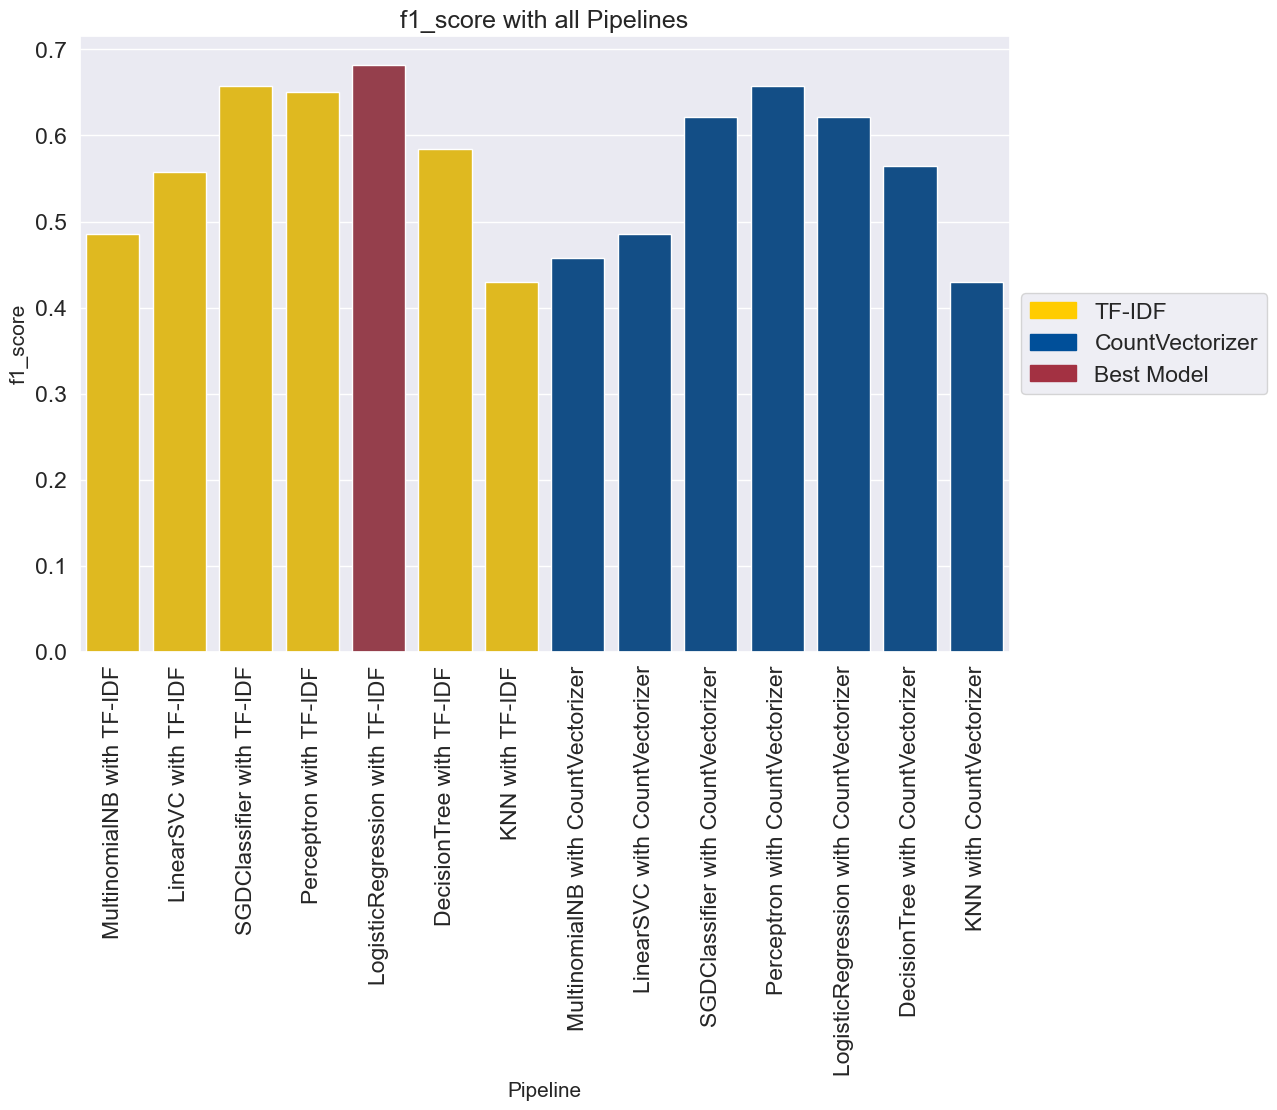

In [27]:
# Define the custom color palette with darker shades of yellow and blue
colors = ['#FFCC00'] * len(results)  # Set all bars to a darker shade of yellow initially
colors[4] = '#A33142'  # Set the 5th bar to a darker shade of red
for i in range(7, 14):
    colors[i] = '#004F99'  # Set bars with indices 7 to 13 to a darker shade of blue

# Set the style for the plot
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Create the bar plot with custom colors
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize to make the plot smaller if needed
sns.barplot(x='Pipeline', y='f1_score', data=results, ax=ax, palette=colors)

# Set the labels for the plot
ax.set_xlabel("Pipeline", fontsize=15)
ax.set_ylabel("f1_score", fontsize=15)

# Set the title for the plot
ax.set_title('f1_score with all Pipelines', fontsize=18)

# Create a custom legend
legend_colors = {'TF-IDF': '#FFCC00', 'CountVectorizer': '#004F99', 'Best Model' : '#A33142'}
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors.values()]
labels = list(legend_colors.keys())
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the rotation of x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Step 5: Prediction
The prediction step involves using the best model, TF-IDF with Logistic Regression, to make predictions on new data by transforming the text into numerical features and utilizing the model's learned parameters to calculate the predictions.

### Step 5.1: Best Model Choosing
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To convert the ***'f1_score'*** column in the **results** dataframe to numeric values, and then identify the row with the highest ***'f1_score'*** as the best model.


<u><b>Explanation of the step:</b></u>
 This code first converts the ***'f1_score'*** column in the **results** dataframe to numeric values using the **pd.to_numeric()** function, ensuring that the values are treated as numerical data.
    
Then, it uses the **idxmax()** method on the ***'f1_score'*** column to find the index of the maximum value.
    
Finally, the code retrieves the row corresponding to the index of the maximum ***'f1_score'*** value and assigns it to the variable ***'best_model'***.

In [28]:
results['f1_score'] = pd.to_numeric(results['f1_score'])
best_model = results.loc[results['f1_score'].idxmax()]
best_model

Pipeline    LogisticRegression with TF-IDF
f1_score                             0.682
Name: 4, dtype: object

### Step 5.2: Creation Of The Model To Predict
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
To train a machine learning pipeline for text classification using **TF-IDF vectorization**, feature scaling, and **Logistic Regression** as the classifier, and then use it to make predictions on the test data.


<u><b>Explanation of the step:</b></u>
 This code creates a machine learning pipeline for text classification, which involves transforming the text data into numerical features using **TF-IDF vectorization**, scaling the features using **MaxAbsScaler()**, and applying **Logistic Regression** as the classifier.
    
The pipeline is trained on the training data ***df_train_tokenized['story']*** and ***df_train_tokenized['gender']***, enabling it to learn the patterns and relationships between the input text and the corresponding gender labels.
    
After training, the pipeline is used to predict the gender labels for the test data ***df_test['story']***, providing the model's predictions based on its learned associations.

In [29]:
pipeline_train = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                 ('scaler', MaxAbsScaler()),
                                 ('classifier',LogisticRegression(C=10.0, max_iter=1000, penalty='l1',solver='saga'))])

pipeline_train.fit(df_train_tokenized['story'], df_train_tokenized['gender'])
y_prediction_test = pipeline_train.predict(df_test['story'])

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='saga'))])

### Step 5.3: The Prediction (finally)
<div class="alert alert-block alert-info">
<u><b>Purpose of the step:</b></u>
    
 To create a new dataframe, ***df_predicted***, that combines the ***'test_example_id'*** column from df_test with the predicted gender labels from ***y_prediction_test*** as the ***'predicted_gender'*** column.


<u><b>Explanation of the step:</b></u>
    
 This code creates a new dataframe called **df_predicted** by combining the ***'test_example_id'*** column from the dataframe **df_test** with the predicted gender labels stored in the **y_prediction_test** array, converting them to Python lists.
    
The resulting dataframe **df_predicted** contains two columns: ***'test_example_id'*** which holds the original test example
IDs, and ***'predicted_gender'*** which contains the predicted gender labels assigned by the model for each corresponding test example.

In [30]:
df_predicted = pd.DataFrame({
    'test_example_id': df_test['test_example_id'].tolist(),
    'predicted_gender': y_prediction_test.tolist()
})
df_predicted

,test_example_id,predicted_gender
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [31]:
df_predicted.to_csv('classification_results.csv',index=False)